In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
dataset=pd.read_csv("dataset_nettoyé.csv")
dataset=dataset.drop(columns=["Unnamed: 0"])
dataset.head()

,product_name,brands,countries_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,Farine de blé noir,Ferme t'y R'nao,France,1100.0,5.00,1.79,20.60,5.71,1.5,4.76,0.58166,10.0
1,Banana Chips Sweetened (Whole),Carrefour,États-Unis,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,14.0
2,Peanuts,Torn & Glasser,États-Unis,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.0
3,Organic Salted Nut Mix,Grizzlies,États-Unis,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,12.0
4,Organic Polenta,Bob's Red Mill,États-Unis,1552.0,1.43,1.79,77.14,5.71,5.7,8.57,0.58166,10.0


In [3]:
dataset.nunique()

product_name               221347
brands                      58784
countries_fr                  722
energy_100g                  3997
fat_100g                     3374
saturated-fat_100g           2194
carbohydrates_100g           5401
sugars_100g                  4052
fiber_100g                   1011
proteins_100g                2499
salt_100g                    5511
nutrition-score-fr_100g        55
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298606 entries, 0 to 298605
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             298606 non-null  object 
 1   brands                   298606 non-null  object 
 2   countries_fr             298606 non-null  object 
 3   energy_100g              298606 non-null  float64
 4   fat_100g                 298606 non-null  float64
 5   saturated-fat_100g       298606 non-null  float64
 6   carbohydrates_100g       298606 non-null  float64
 7   sugars_100g              298606 non-null  float64
 8   fiber_100g               298606 non-null  float64
 9   proteins_100g            298606 non-null  float64
 10  salt_100g                298606 non-null  float64
 11  nutrition-score-fr_100g  298606 non-null  float64
dtypes: float64(9), object(3)
memory usage: 27.3+ MB


In [5]:
dataset.duplicated().sum()

0

In [6]:
dataset.head()

,product_name,brands,countries_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,Farine de blé noir,Ferme t'y R'nao,France,1100.0,5.00,1.79,20.60,5.71,1.5,4.76,0.58166,10.0
1,Banana Chips Sweetened (Whole),Carrefour,États-Unis,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,14.0
2,Peanuts,Torn & Glasser,États-Unis,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.0
3,Organic Salted Nut Mix,Grizzlies,États-Unis,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,12.0
4,Organic Polenta,Bob's Red Mill,États-Unis,1552.0,1.43,1.79,77.14,5.71,5.7,8.57,0.58166,10.0


In [7]:
dataset.head()

,product_name,brands,countries_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,Farine de blé noir,Ferme t'y R'nao,France,1100.0,5.00,1.79,20.60,5.71,1.5,4.76,0.58166,10.0
1,Banana Chips Sweetened (Whole),Carrefour,États-Unis,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,14.0
2,Peanuts,Torn & Glasser,États-Unis,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.0
3,Organic Salted Nut Mix,Grizzlies,États-Unis,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,12.0
4,Organic Polenta,Bob's Red Mill,États-Unis,1552.0,1.43,1.79,77.14,5.71,5.7,8.57,0.58166,10.0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298606 entries, 0 to 298605
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             298606 non-null  object 
 1   brands                   298606 non-null  object 
 2   countries_fr             298606 non-null  object 
 3   energy_100g              298606 non-null  float64
 4   fat_100g                 298606 non-null  float64
 5   saturated-fat_100g       298606 non-null  float64
 6   carbohydrates_100g       298606 non-null  float64
 7   sugars_100g              298606 non-null  float64
 8   fiber_100g               298606 non-null  float64
 9   proteins_100g            298606 non-null  float64
 10  salt_100g                298606 non-null  float64
 11  nutrition-score-fr_100g  298606 non-null  float64
dtypes: float64(9), object(3)
memory usage: 27.3+ MB


In [9]:
dataset.drop_duplicates().reset_index(drop=True)

,product_name,brands,countries_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,Farine de blé noir,Ferme t'y R'nao,France,1100.0,5.00,1.79,20.60,5.71,1.5,4.76,0.58166,10.0
1,Banana Chips Sweetened (Whole),Carrefour,États-Unis,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,14.0
2,Peanuts,Torn & Glasser,États-Unis,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.0
3,Organic Salted Nut Mix,Grizzlies,États-Unis,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,12.0
4,Organic Polenta,Bob's Red Mill,États-Unis,1552.0,1.43,1.79,77.14,5.71,5.7,8.57,0.58166,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298601,Tomato & ricotta,Panzani,Roumanie,1100.0,5.00,1.79,20.60,5.71,1.5,4.76,0.58166,10.0
298602,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,États-Unis,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00000,0.0
298603,乐吧泡菜味薯片,乐吧,Chine,1100.0,5.00,1.79,20.60,5.71,1.5,4.76,0.58166,10.0
298604,Tomates aux Vermicelles,Knorr,France,1100.0,5.00,1.79,20.60,5.71,1.5,4.76,0.58166,10.0


In [10]:
dataset.head()

,product_name,brands,countries_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,Farine de blé noir,Ferme t'y R'nao,France,1100.0,5.00,1.79,20.60,5.71,1.5,4.76,0.58166,10.0
1,Banana Chips Sweetened (Whole),Carrefour,États-Unis,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,14.0
2,Peanuts,Torn & Glasser,États-Unis,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.0
3,Organic Salted Nut Mix,Grizzlies,États-Unis,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,12.0
4,Organic Polenta,Bob's Red Mill,États-Unis,1552.0,1.43,1.79,77.14,5.71,5.7,8.57,0.58166,10.0


In [11]:
dataset.tail()

,product_name,brands,countries_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
298601,Tomato & ricotta,Panzani,Roumanie,1100.0,5.0,1.79,20.6,5.71,1.5,4.76,0.58166,10.0
298602,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,États-Unis,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00000,0.0
298603,乐吧泡菜味薯片,乐吧,Chine,1100.0,5.0,1.79,20.6,5.71,1.5,4.76,0.58166,10.0
298604,Tomates aux Vermicelles,Knorr,France,1100.0,5.0,1.79,20.6,5.71,1.5,4.76,0.58166,10.0
298605,"Sugar Free Drink Mix, Peach Tea",Market Pantry,États-Unis,2092.0,0.0,1.79,0.0,0.00,1.5,0.00,0.00000,10.0


In [12]:
dataset.shape

(298606, 12)

In [13]:
names=dataset.index
features=dataset.iloc[:,3:12].columns

In [14]:
DF=dataset.iloc[:,3:12]

In [15]:
df=DF.values

In [16]:
df.shape

(298606, 9)

In [17]:
sc=StandardScaler()

In [18]:
sc.fit(df)

StandardScaler()

# Réduction dimensionelle

In [19]:
df_reshaped=sc.transform(df)

In [20]:
df_reshaped[:,3:12]

array([[-0.3468727 , -0.42301328, -0.23149884, -0.26351811, -0.1457169 ,
         0.07844123],
       [ 1.3171419 ,  0.02331136,  0.32315215, -0.42153141, -0.24121906,
         0.59769509],
       [ 1.18079097,  0.20901986,  1.24757046,  1.47595609, -0.13695906,
        -1.21969341],
       ...,
       [-0.3468727 , -0.42301328, -0.23149884, -0.26351811, -0.1457169 ,
         0.07844123],
       [-0.3468727 , -0.42301328, -0.23149884, -0.26351811, -0.1457169 ,
         0.07844123],
       [-1.13146187, -0.72004285, -0.23149884, -0.89557133, -0.24121906,
         0.07844123]])

In [21]:
pd.DataFrame(df_reshaped).describe().round(2)

,0,1,2,3,4,5,6,7,8
count,298606.00,298606.00,298606.00,298606.00,298606.00,298606.00,298606.00,298606.00,298606.00
mean,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.19,-0.71,-0.61,-1.13,-0.72,-0.63,-0.90,-0.24,-3.17
25%,-0.11,-0.66,-0.58,-0.79,-0.60,-0.50,-0.71,-0.22,-0.83
50%,-0.01,-0.39,-0.36,-0.35,-0.42,-0.23,-0.26,-0.15,0.08
75%,0.08,0.27,0.10,0.79,0.14,0.01,0.27,-0.05,0.60
max,539.28,5.67,13.67,2.68,4.48,25.78,12.38,16.18,3.97


In [22]:
comp=9

In [23]:
pca=PCA(n_components=comp)

In [24]:
pca.fit(df_reshaped)

PCA(n_components=9)

In [25]:
pca.explained_variance_ratio_

array([0.25454424, 0.19741303, 0.1430485 , 0.11174139, 0.10851639,
       0.07850227, 0.04034186, 0.03480175, 0.03109057])

In [26]:
var=(pca.explained_variance_ratio_*100).round(2)
var

array([25.45, 19.74, 14.3 , 11.17, 10.85,  7.85,  4.03,  3.48,  3.11])

In [27]:
var_cum=var.cumsum().round(2)
var_cum

array([25.45, 45.19, 59.49, 70.66, 81.51, 89.36, 93.39, 96.87, 99.98])

In [28]:
x_list = range(1, comp+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

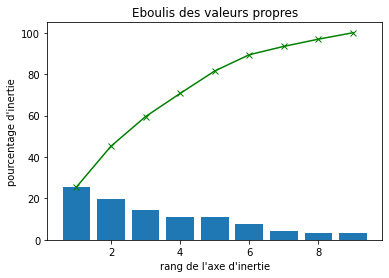

In [29]:
plt.bar(x_list, var)
plt.plot(x_list, var_cum,c="green",marker='x')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [30]:
pcs=pca.components_
pcs

array([[ 1.14545191e-01,  4.90043633e-01,  5.37353029e-01,
         2.17503515e-01,  2.91473309e-01,  6.11989838e-02,
         1.58576185e-01, -2.10385847e-02,  5.44416702e-01],
       [-3.84093067e-03,  3.16644146e-01,  2.35988136e-01,
        -5.80373959e-01, -6.00778400e-01, -5.22307170e-03,
         3.69835274e-01,  6.94497535e-02, -6.80737352e-02],
       [ 1.48246050e-01,  3.11977267e-02, -1.14344720e-01,
         2.97756016e-01, -3.87479646e-02,  7.62188205e-01,
         4.43826229e-01, -1.59034407e-01, -2.65726405e-01],
       [ 4.66156857e-02,  8.43339834e-02,  6.71717044e-02,
        -7.86828632e-02, -1.21070291e-02, -1.54059078e-01,
        -9.77348125e-02, -9.67164998e-01, -1.05691629e-01],
       [ 9.80483604e-01, -3.95948253e-02, -5.78820880e-02,
        -5.15195363e-02, -4.22004213e-02, -1.21509296e-01,
        -8.94556538e-02,  7.59261400e-02, -2.76961326e-02],
       [-1.21772941e-02,  3.20989941e-01,  1.84874797e-01,
        -1.04825201e-01, -1.04463867e-01,  4.500965

In [31]:
PCS=pd.DataFrame(pcs)
PCS

,0,1,2,3,4,5,6,7,8
0,0.114545,0.490044,0.537353,0.217504,0.291473,0.061199,0.158576,-0.021039,0.544417
1,-0.003841,0.316644,0.235988,-0.580374,-0.600778,-0.005223,0.369835,0.069450,-0.068074
2,0.148246,0.031198,-0.114345,0.297756,-0.038748,0.762188,0.443826,-0.159034,-0.265726
3,0.046616,0.084334,0.067172,-0.078683,-0.012107,-0.154059,-0.097735,-0.967165,-0.105692
4,0.980484,-0.039595,-0.057882,-0.051520,-0.042200,-0.121509,-0.089456,0.075926,-0.027696
5,-0.012177,0.320990,0.184875,-0.104825,-0.104464,0.450097,-0.771029,0.077504,-0.194055
6,0.033143,-0.618909,0.232766,-0.469819,0.132683,0.387314,-0.041639,-0.101031,0.401727
7,0.006045,-0.348600,0.739098,0.250311,-0.043598,-0.154993,0.043216,0.074832,-0.485931
8,0.009129,0.205756,-0.000355,-0.473265,0.721292,-0.013260,0.159536,0.080345,-0.425743


In [32]:
PCS.columns=features
PCS.round(2)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0.11,0.49,0.54,0.22,0.29,0.06,0.16,-0.02,0.54
1,-0.00,0.32,0.24,-0.58,-0.60,-0.01,0.37,0.07,-0.07
2,0.15,0.03,-0.11,0.30,-0.04,0.76,0.44,-0.16,-0.27
3,0.05,0.08,0.07,-0.08,-0.01,-0.15,-0.10,-0.97,-0.11
4,0.98,-0.04,-0.06,-0.05,-0.04,-0.12,-0.09,0.08,-0.03
5,-0.01,0.32,0.18,-0.10,-0.10,0.45,-0.77,0.08,-0.19
6,0.03,-0.62,0.23,-0.47,0.13,0.39,-0.04,-0.10,0.40
7,0.01,-0.35,0.74,0.25,-0.04,-0.15,0.04,0.07,-0.49
8,0.01,0.21,-0.00,-0.47,0.72,-0.01,0.16,0.08,-0.43


In [33]:
PCS.T

,0,1,2,3,4,5,6,7,8
energy_100g,0.114545,-0.003841,0.148246,0.046616,0.980484,-0.012177,0.033143,0.006045,0.009129
fat_100g,0.490044,0.316644,0.031198,0.084334,-0.039595,0.320990,-0.618909,-0.348600,0.205756
saturated-fat_100g,0.537353,0.235988,-0.114345,0.067172,-0.057882,0.184875,0.232766,0.739098,-0.000355
carbohydrates_100g,0.217504,-0.580374,0.297756,-0.078683,-0.051520,-0.104825,-0.469819,0.250311,-0.473265
sugars_100g,0.291473,-0.600778,-0.038748,-0.012107,-0.042200,-0.104464,0.132683,-0.043598,0.721292
fiber_100g,0.061199,-0.005223,0.762188,-0.154059,-0.121509,0.450097,0.387314,-0.154993,-0.013260
proteins_100g,0.158576,0.369835,0.443826,-0.097735,-0.089456,-0.771029,-0.041639,0.043216,0.159536
salt_100g,-0.021039,0.069450,-0.159034,-0.967165,0.075926,0.077504,-0.101031,0.074832,0.080345
nutrition-score-fr_100g,0.544417,-0.068074,-0.265726,-0.105692,-0.027696,-0.194055,0.401727,-0.485931,-0.425743


<AxesSubplot:>

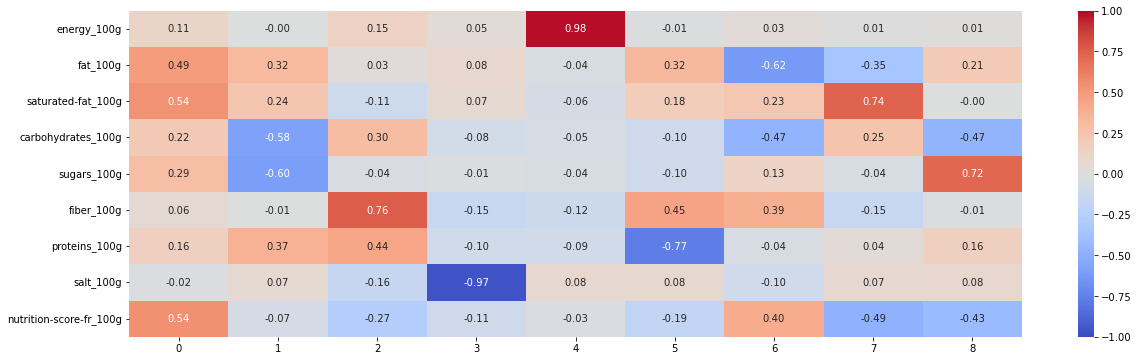

In [34]:
fig, ax = plt.subplots(figsize=(20, 6))
sb.heatmap(PCS.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

# graphe de corrélation


In [35]:
x,y =0,1

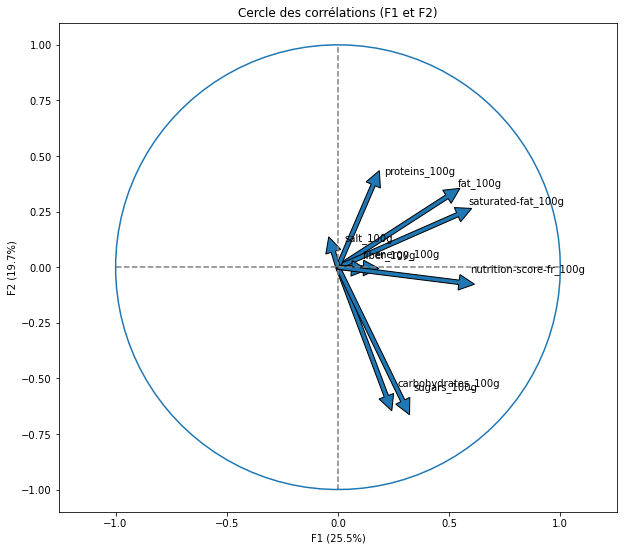

In [36]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [37]:
X_proj = pca.transform(df_reshaped)
X_proj[:5]

array([[-0.59095001,  0.13700427, -0.35017773,  0.16958991,  0.10431771,
        -0.03713775,  0.23096426, -0.22134044, -0.30465591],
       [ 3.00716398,  0.17708313, -0.00437834,  0.39310855, -0.16999017,
         1.19192791, -0.08556024,  2.12675698, -0.72204549],
       [-0.1346505 , -0.20603575,  2.39859457, -0.16893334, -0.18061635,
        -0.47199394, -0.98704842,  0.13708349,  0.40953406],
       [ 1.78932196,  2.06144252,  1.51747186, -0.02254708, -0.14694971,
         0.42590851, -1.0711163 , -1.29537277,  0.50611552],
       [-0.07738268, -1.0038261 ,  1.36506983, -0.23588623, -0.10413048,
        -0.22760675, -0.2288513 ,  0.24739819, -1.3039358 ]])

In [38]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    plt.scatter(   X_[:, x], 
                        X_[:, y], 
                        alpha=alpha, 
                        c=c, 
                        cmap="Set1", 
                        marker=marker)


    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

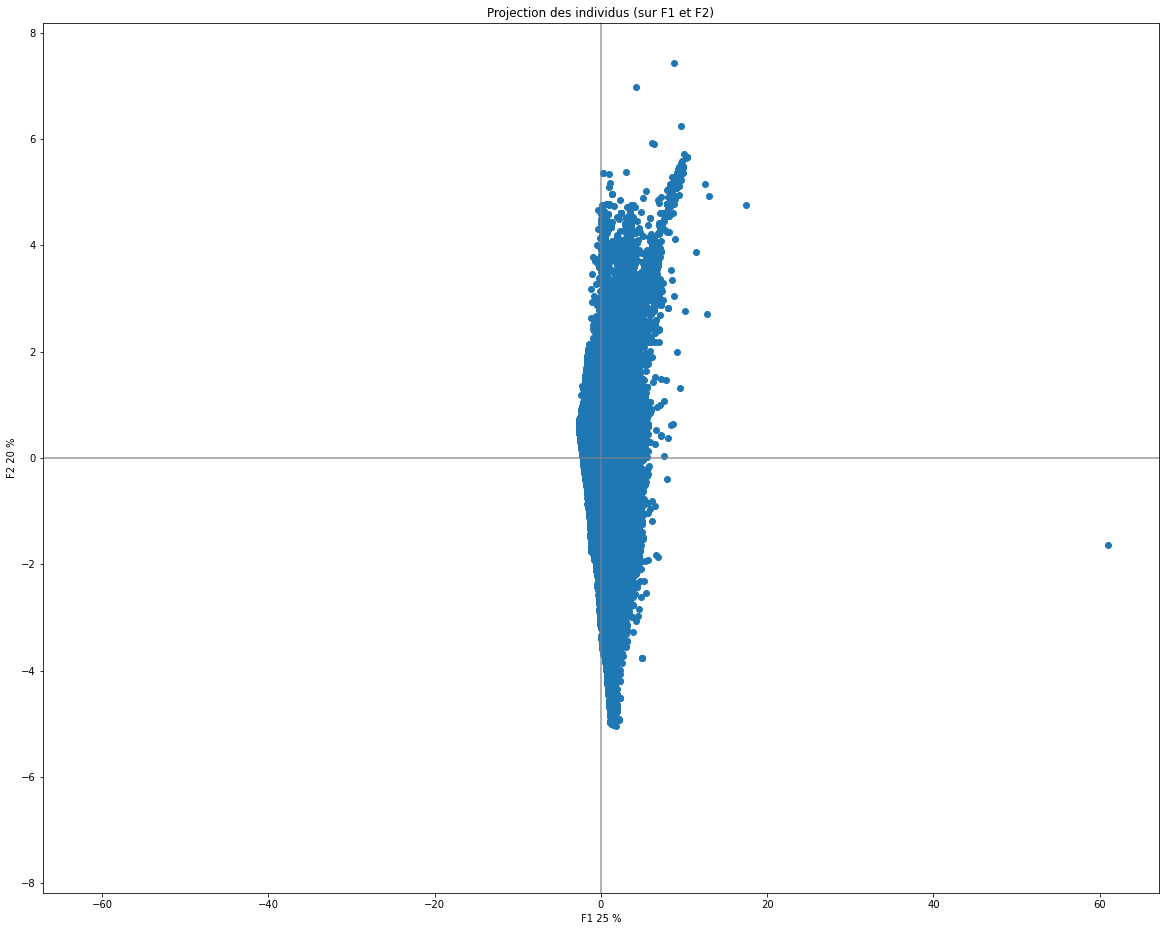

In [39]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(20,16), marker="o")